In [43]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib
import numpy as np
import math

In [44]:
ROOTS = np.array([np.e ** (i * 2/3 * 1j * np.pi) for i in range(3)])
EPS = 1e-10

def fn(z):
    return z ** 3 - 1

def fn_d(z):
    return 3 * z ** 2

def next_value(z):
    return z - fn(z) / fn_d(z)

def find_root(z):
    prev = float("inf")
    cur = z
    while abs(cur - prev) >= EPS:
        prev = cur
        cur = next_value(cur)
    return cur

In [45]:
def closest_root(z):
    if z == 0:
        return -1
    rez = find_root(z)
    # numpy function that returns an array of indices whose elements satisfy the condition
    r2 = np.where(abs(rez - ROOTS) < EPS)[0]
    if len(r2) == 0:
        return -1
    return r2[0]

In [46]:
def calc_field(fromX, toX, fromY, toY, step):
    n = math.floor((toX - fromX) / step) + 1
    m = math.floor((toY - fromY) / step) + 1
    rez = np.empty((n, m))
    for i in range(n):
        for j in range(m):
            x = fromX + i * step
            y = fromY + j * step
            rez[j][i] = closest_root(x + y * 1j)
    return rez

def get_plot(fromX, toX, fromY, toY, step):
    rez = calc_field(fromX, toX, fromY, toY, step)

    fig = plt.figure(figsize=(16, 16))
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.imshow(rez,
               extent=(fromX,toX,fromY, toY),
               cmap=clr.ListedColormap(['#000000', '#f19cbb', '#fbcc38', '#82de3a']),
               norm=clr.Normalize(-1,3),
              origin='lower')

    # draw roots on plot
    for root in ROOTS:
        ax1.scatter(root.real, root.imag, s=30, color='black')

    return fig

pass

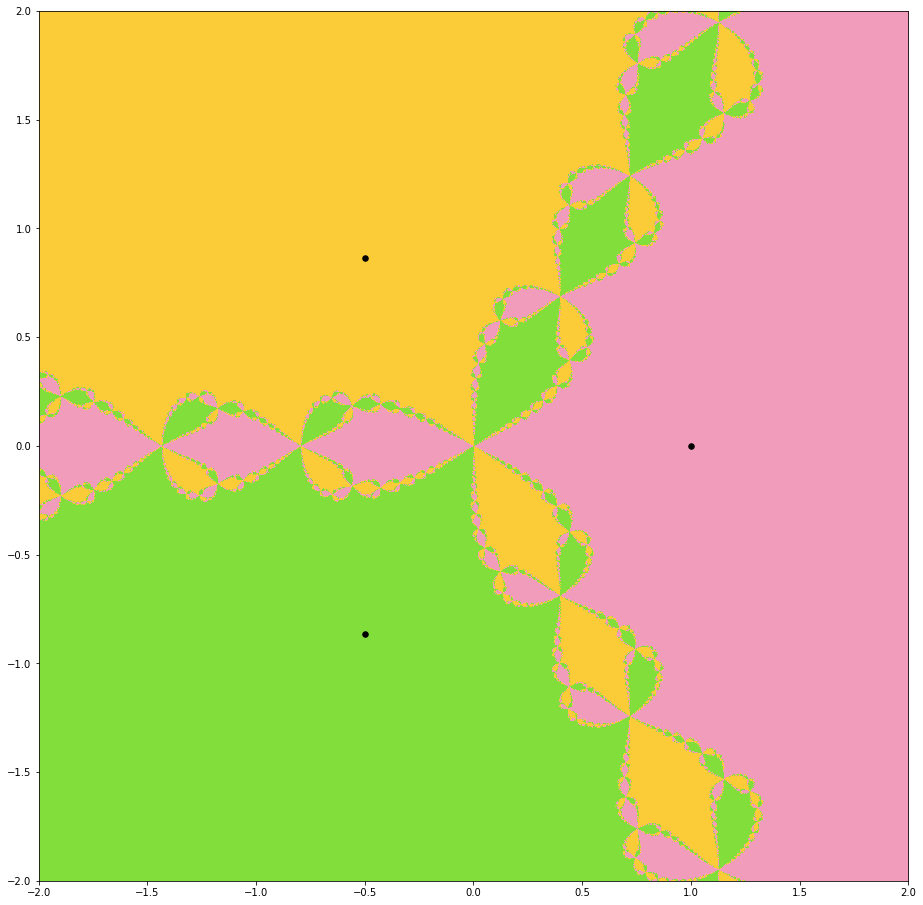

In [47]:
get_plot(-2, 2, -2, 2, 0.001)
pass

In [48]:
color_set1 = matplotlib.cm.get_cmap('Set1')

def draw_tracks(z_list):
    pl = get_plot(-2, 2, -2, 2, 0.001)
    for index in range(len(z_list)):
        prev = float("inf")
        cur = z_list[index]
        eps = 0.00000001
        track = [cur]
        while abs(cur - prev) >= eps:
            prev = cur
            cur = next_value(cur)
            track.append(cur)

        pl.get_axes()[0].plot([x.real for x in track], [x.imag for x in track], color=color_set1.colors[index % color_set1.N])
    return pl

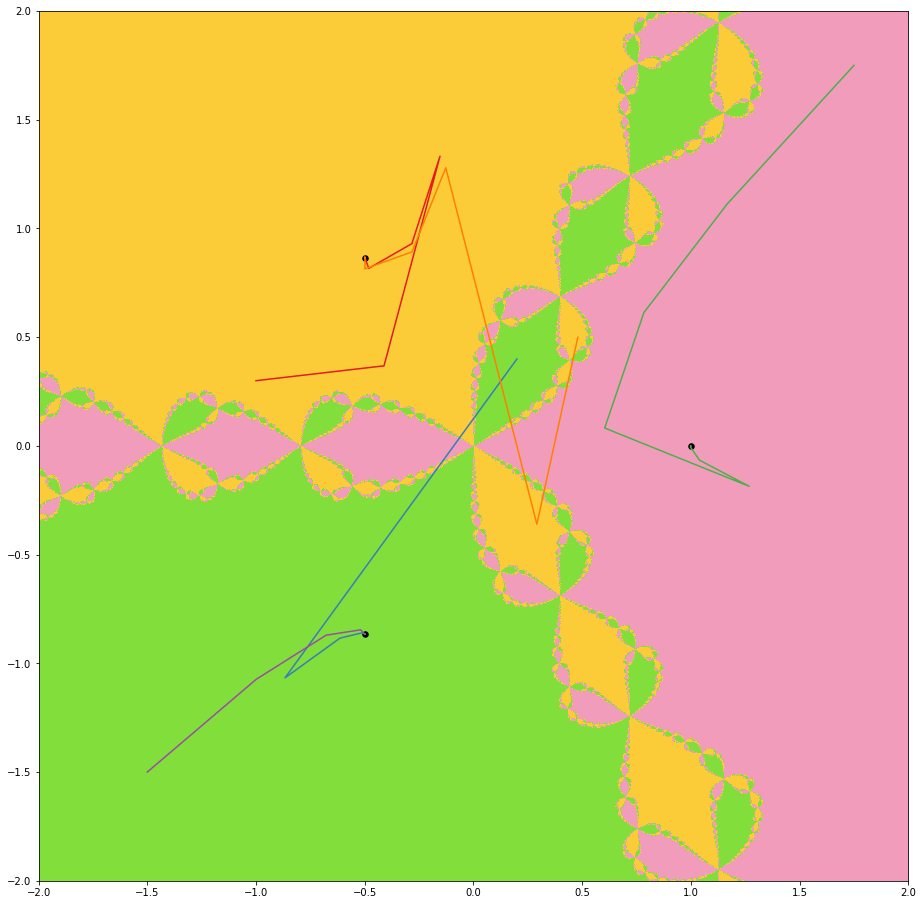

In [49]:
draw_tracks([-1+0.3j, 0.2+0.4j, 1.75+1.75j, -1.5-1.5j, 0.48+0.5j])
pass